# Tensor Basics
This section covers:
* Converting NumPy arrays to PyTorch tensors
* Creating tensors from scratch

## Perform standard imports

In [1]:
import torch

Confirm you're using PyTorch version 1.1.0

In [2]:
torch.__version__

'2.4.0'

## Converting NumPy arrays to PyTorch tensors
A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>
In some cases tensors are used as a replacement for NumPy to use the power of GPUs (more on this later).

In [3]:
import numpy as np

arr = np.array([1,2,3,4,5.0])
print(arr)
print(arr.dtype)
print(type(arr))

[1. 2. 3. 4. 5.]
float64
<class 'numpy.ndarray'>


In [4]:
x = torch.from_numpy(arr)

print(x)
print(x.dtype)

# Print the tensor object type
print(type(x))
print(x.type()) # this is more specific!

tensor([1., 2., 3., 4., 5.], dtype=torch.float64)
torch.float64
<class 'torch.Tensor'>
torch.DoubleTensor


In [5]:
x = torch.as_tensor(arr)

print(x)
print(x.dtype)

# Print the tensor object type
print(type(x))
print(x.type()) # this is more specific!

tensor([1., 2., 3., 4., 5.], dtype=torch.float64)
torch.float64
<class 'torch.Tensor'>
torch.DoubleTensor


In [ ]:
#2D array


<h2><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h2>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

___
# Tensor Operations
This section covers:
* Indexing and slicing
* Reshaping tensors (tensor views)
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication
* Additional, more advanced operations

## Perform standard imports

In [6]:
import torch
import numpy as np

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br>

In [7]:
torch.arange(6)

tensor([0, 1, 2, 3, 4, 5])

In [8]:
x = torch.arange(6).reshape(3,2)
print(x)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


## Reshape tensors with <tt>.view()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

In [9]:
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [10]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [11]:
x.reshape(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [12]:
# x is unchanged
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [18]:
a = torch.tensor([1,2,3], dtype=torch.float32)
b = torch.tensor([4,5,6], dtype=torch.float16)
print(a + b)

tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [20]:
print((torch.add(a, b).dtype))
print((torch.add(a, b)))

torch.float32
tensor([5., 7., 9.])


With an output tensor passed in as an argument:

In [21]:
result = torch.empty(3)
torch.add(a, b, out=result)  # equivalent to result=torch.add(a,b)
print(result)

tensor([5., 7., 9.])


Changing a tensor in-place

In [22]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5., 7., 9.])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

#### Use the space below to experiment with different operations

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)

In [ ]:
#min, max, mean, sum



## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [23]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # element-wise multiplication
print(a.dot(b))

tensor([ 4., 10., 18.])
tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [24]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])


In [25]:
print('a x b: \n',torch.mm(a,b))

a x b: 
 tensor([[56., 62.],
        [80., 89.]])


In [26]:
print('a x b: \n',a.mm(b))

a x b: 
 tensor([[56., 62.],
        [80., 89.]])


In [27]:
print('a x b: \n',a @ b)

a x b: 
 tensor([[56., 62.],
        [80., 89.]])


In [ ]:
# Create tensor A with size of 5x4.
# Create tensor B with column size 5.
# Compute the product of tensor A and tensor B.




___
# PyTorch Gradients
This section covers the PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> implementation of gradient descent. Tools include:
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward'><tt><strong>torch.autograd.backward()</strong></tt></a>
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.grad'><tt><strong>torch.autograd.grad()</strong></tt></a>


<div class="alert alert-info"><h3>Additional Resources:</h3>
<strong>
<a href='https://pytorch.org/docs/stable/notes/autograd.html'>PyTorch Notes:</a></strong>&nbsp;&nbsp;<font color=black>Autograd mechanics</font></div>

## Autograd - Automatic Differentiation
In previous sections we created tensors and performed a variety of operations on them, but we did nothing to store the sequence of operations, or to apply the derivative of a completed function.

In this section we'll introduce the concept of the <em>dynamic computational graph</em> which is comprised of all the <em>Tensor</em> objects in the network, as well as the <em>Functions</em> used to create them. Note that only the input Tensors we create ourselves will not have associated Function objects.

The PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> package provides automatic differentiation for all operations on Tensors. This is because operations become attributes of the tensors themselves. When a Tensor's <tt>.requires_grad</tt> attribute is set to True, it starts to track all operations on it. When an operation finishes you can call <tt>.backward()</tt> and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its <tt>.grad</tt> attribute.
    
Let's see this in practice.

## Back-propagation on one step
We'll start by applying a single polynomial function $y = f(x)$ to tensor $x$. Then we'll backprop and print the gradient $\frac {dy} {dx}$.

$\begin{split}Function:\quad y &= 2x^4 + x^3 + 3x^2 + 5x + 1 \\
Derivative:\quad y' &= 8x^3 + 3x^2 + 6x + 5\end{split}$

#### Step 1. Perform standard imports

In [ ]:
import torch

#### Step 2. Create a tensor with <tt>requires_grad</tt> set to True
This sets up computational tracking on the tensor.

In [29]:
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad) # gradient has not yet been computed

tensor(2., requires_grad=True)
None


#### Step 3. Define a function

In [30]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


Since $y$ was created as a result of an operation, it has an associated gradient function accessible as <tt>y.grad_fn</tt><br>
The calculation of $y$ is done as:<br>

$\quad y=2(2)^4+(2)^3+3(2)^2+5(2)+1 = 32+8+12+10+1 = 63$

This is the value of $y$ when $x=2$.

#### Step 4. Backprop

In [31]:
#perform backpropagation and compute all gradients
y.backward()

#### Step 5. Display the resulting gradient

In [32]:
print(x.grad)

tensor(93.)


Note that <tt>x.grad</tt> is an attribute of tensor $x$, so we don't use parentheses. The computation is the result of<br>

$\quad y'=8(2)^3+3(2)^2+6(2)+5 = 64+12+12+5 = 93$

This is the slope of the polynomial at the point $(2,63)$.

## Back-propagation on multiple steps
Now let's do something more complex, involving layers $y$ and $z$ between $x$ and our output layer $out$.
#### 1. Create a tensor

In [33]:
#tensor(Layer, row, col) -> image rgb

x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


#### 2. Create the first layer with $y = 3x+2$

In [34]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


#### 3. Create the second layer with $z = 2y^2$

In [35]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


#### 4. Set the output to be the matrix mean

In [37]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


#### 5. Now perform back-propagation to find the gradient of x w.r.t out
(If you haven't seen it before, w.r.t. is an abbreviation of <em>with respect to</em>)

In [38]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


You should see a 2x3 matrix. If we call the final <tt>out</tt> tensor "$o$", we can calculate the partial derivative of $o$ with respect to $x_i$ as follows:<br>

$o = \frac {1} {6}\sum_{i=1}^{6} z_i$<br>

$z_i = 2(y_i)^2 = 2(3x_i+2)^2$<br>

To solve the derivative of $z_i$ we use the <a href='https://en.wikipedia.org/wiki/Chain_rule'>chain rule</a>, where the derivative of $f(g(x)) = f'(g(x))g'(x)$<br>

In this case<br>

$\begin{split} f(g(x)) &= 2(g(x))^2, \quad &f'(g(x)) = 4g(x) \\
g(x) &= 3x+2, &g'(x) = 3 \\
\frac {dz} {dx} &= 4g(x)\times 3 &= 12(3x+2) \end{split}$

Therefore,<br>

$\frac{\partial o}{\partial x_i} = \frac{1}{6}\times 12(3x+2)$<br>

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = 2(3(1)+2) = 10$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=2} = 2(3(2)+2) = 16$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=3} = 2(3(3)+2) = 22$

___
# Linear Regression with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.


## Perform standard imports

In [39]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a column matrix of X values
We can create tensors right away rather than convert from NumPy arrays.

In [40]:
X = torch.linspace(1,50,50).reshape(-1,1)

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

## Create a column matrix of y values
Here we'll set our own parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$, plus the error amount.<br><strong><tt>y</tt></strong> will have the same shape as <strong><tt>X</tt></strong> and <strong><tt>e</tt></strong>

In [41]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


## Plot the results
We have to convert tensors to NumPy arrays just for plotting.

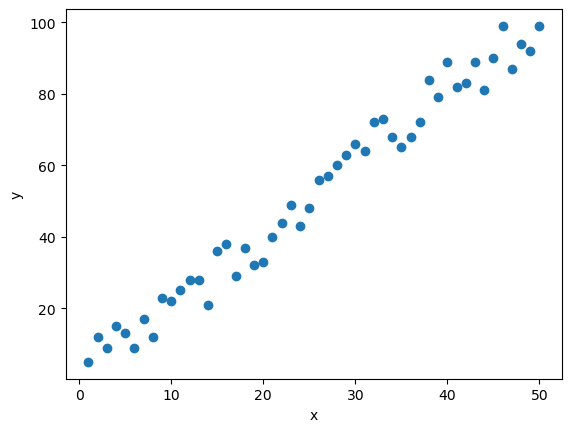

In [42]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

## Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [43]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

## Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [44]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [45]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [46]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


Now let's see the result when we pass a tensor into the model.

In [47]:
x = torch.tensor([2.0])
print(model(x))   # equivalent to print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

In [48]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [49]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


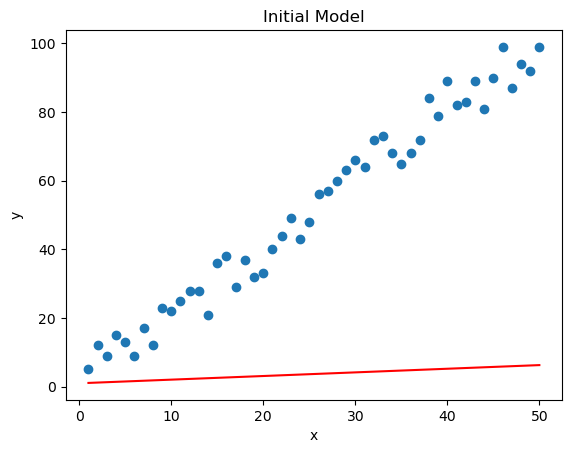

In [50]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [51]:
criterion = nn.MSELoss()

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

## Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [53]:
epochs = 50
losses = []

for i in range(epochs):
    # forward step
    y_pred = model.forward(X)
    # compute loss (error)
    loss = criterion(y_pred, y)
    # append loss to a list for plotting and analysis
    losses.append(loss.detach().numpy())
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}', end='')
    print(f'weight: {model.linear.weight.item():10.8f}', end='')
    print(f'bias: {model.linear.bias.item():10.8f}')
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upade weights and biases
    optimizer.step()

epoch:  0  loss: 3057.21679688weight: 0.10597813bias: 0.96379614
epoch:  1  loss: 1588.53112793weight: 3.33490038bias: 1.06046367
epoch:  2  loss: 830.29998779weight: 1.01483274bias: 0.99226284
epoch:  3  loss: 438.85241699weight: 2.68179965bias: 1.04252183
epoch:  4  loss: 236.76152039weight: 1.48402119bias: 1.00766504
epoch:  5  loss: 132.42912292weight: 2.34460592bias: 1.03396463
epoch:  6  loss: 78.56572723weight: 1.72622538bias: 1.01632178
epoch:  7  loss: 50.75775909weight: 2.17050409bias: 1.03025162
epoch:  8  loss: 36.40123367weight: 1.85124576bias: 1.02149546
epoch:  9  loss: 28.98922920weight: 2.08060074bias: 1.02903891
epoch: 10  loss: 25.16238213weight: 1.91576838bias: 1.02487016
epoch: 11  loss: 23.18647385weight: 2.03416562bias: 1.02911627
epoch: 12  loss: 22.16612625weight: 1.94905841bias: 1.02731562
epoch: 13  loss: 21.63911057weight: 2.01017213bias: 1.02985907
epoch: 14  loss: 21.36677170weight: 1.96622372bias: 1.02928054
epoch: 15  loss: 21.22591782weight: 1.99776423b

## Plot the loss values
Let's see how loss changed over time

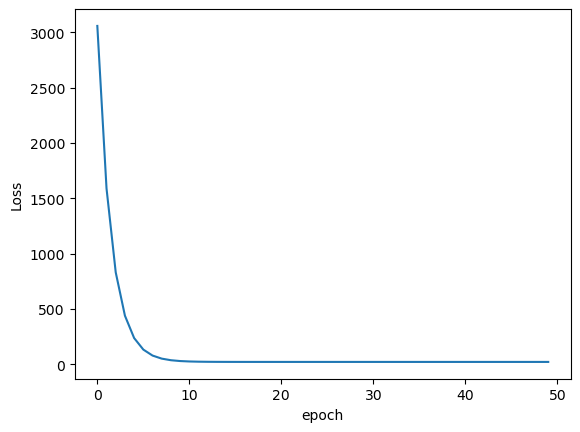

In [54]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [55]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


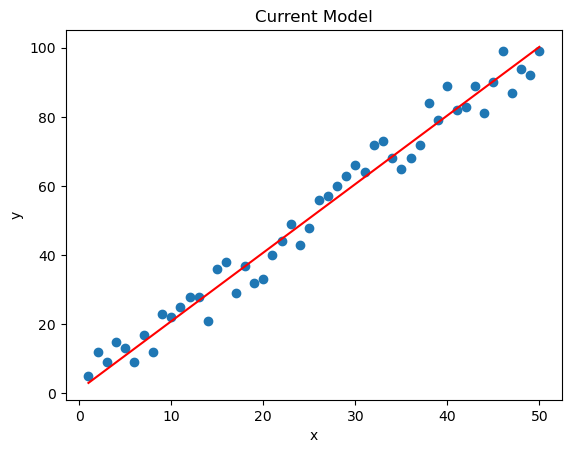

In [56]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

___
# Basic PyTorch Neural Network

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>). The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will compare the target label (ground truth) to the corresponding output score.

## Perform standard imports

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a model class
For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [58]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # 1st hidden layer
        self.fc2 = nn.Linear(h1, h2)            # 2nd hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [59]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

## Load the iris dataset

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Perform Train/Test/Split

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('class',axis=1).values
y = df['class'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y)
y_test = torch.LongTensor(test_y)

## Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [62]:
Tr_set = TensorDataset(X_train,y_train) # create your datset
Tr_dataloader = DataLoader(Tr_set,batch_size=64, shuffle=True) # create your dataloader
Ts_set = TensorDataset(X_test,y_test)
Ts_dataloader = DataLoader(Ts_set,batch_size=64, shuffle=True)

## Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [63]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [65]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Train the model

In [66]:
epochs = 150
losses = []

for i in range(epochs):
    for X, y in Tr_dataloader:
        y_pred = model.forward(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_pred = model.forward(X_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.detach().numpy())
        if i%10 == 1:
            print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

epoch:  1  loss: 1.05592191
epoch: 11  loss: 0.70733768
epoch: 21  loss: 0.34743851
epoch: 31  loss: 0.15905826
epoch: 41  loss: 0.09642036
epoch: 51  loss: 0.07830629
epoch: 61  loss: 0.07481284
epoch: 71  loss: 0.06339094
epoch: 81  loss: 0.06052411
epoch: 91  loss: 0.05775695
epoch: 101  loss: 0.06109943
epoch: 111  loss: 0.07459415
epoch: 121  loss: 0.05458643
epoch: 131  loss: 0.05381037
epoch: 141  loss: 0.05177440


## Plot the loss function

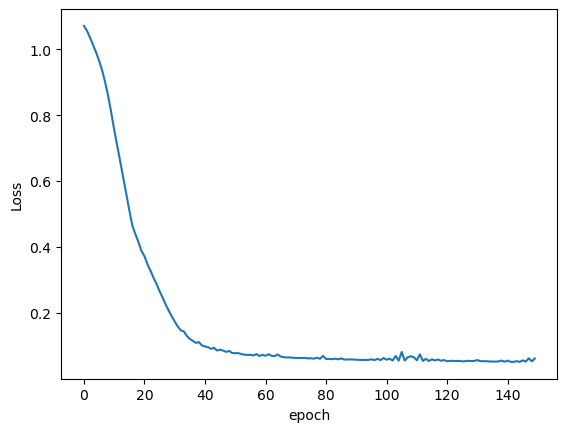

In [67]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [68]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.10912504


In [69]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.2648,  7.0772, -1.0277])     1
 2. tensor([-1.9182,  7.8730, -1.8069])     1
 3. tensor([ 15.7279,   8.4448, -21.4249])  0
 4. tensor([-5.0844,  7.2727,  1.9702])     1
 5. tensor([-10.4809,   6.5712,   8.2458])  2
 6. tensor([-17.6209,   5.8022,  16.4826])  2
 7. tensor([ 15.8535,   8.6604, -21.6634])  0
 8. tensor([ 16.9068,   8.9132, -22.9550])  0
 9. tensor([-10.6230,   6.7605,   8.3121])  2
10. tensor([-14.3066,   6.5645,  12.4585])  2
11. tensor([-15.4019,   6.4154,  13.7360])  2
12. tensor([ 15.3076,   8.0545, -20.7774])  0
13. tensor([-14.5363,   6.1415,  12.9253])  2
14. tensor([-4.9282,  7.1156,  1.8776])     1
15. tensor([-11.7994,   6.6833,   9.6458])  2
16. tensor([-1.8613,  7.6209, -1.7441])     1
17. tensor([-8.1389,  6.5829,  5.6737])     2
18. tensor([ 17.1790,   9.0608, -23.3267])  0
19. tensor([-4.5806,  7.3569,  1.3782])     1
20. tensor([-11.6314,   7.3346,   9.1308])  2
21. tensor([ 16.2263,   8.6145, -22.0595])  0
22. tensor([ 17.9621,   9.6262, -2

Here we can see that #17 was misclassified.

## Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Save the model

In [70]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [71]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

C:\Users\gotxz\AppData\Local\Temp\ipykernel_20500\1704381205.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [72]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.10912504


## Apply the model to classify new, unseen data

In [73]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

Now run it through the model:

In [74]:
labels = ['Iris setosa','Iris versicolor','Iris virginica']

with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 15.4598,   9.1462, -21.4864])

Iris setosa
